Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

Loading the Data and Preprocessing

Confusion Matrix:
 [[15  1  0]
 [ 4 18  0]
 [ 1  0 21]]
Accuracy: 0.9


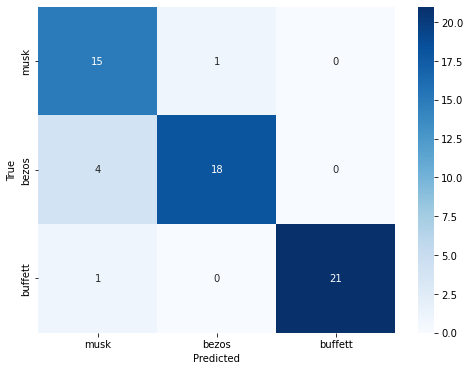

C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


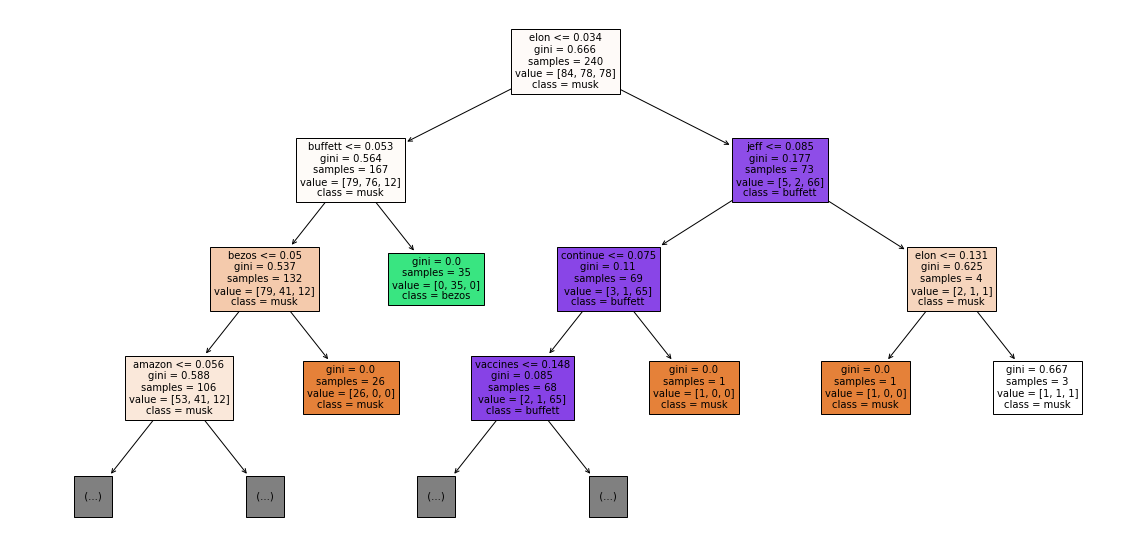

In [6]:
# Read the dataset
data = pd.read_csv("Comment_Data.csv")

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z]+', ' ', text)
    return text

# Preprocess the data
data['comment'] = data['comment'].apply(preprocess_text)

# Split the data into Training and Testing sets
X = data['comment']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_vectorized, y_train)

# Test the model on the Testing Set
y_pred_dt = dt_classifier.predict(X_test_vectorized)

# Evaluate the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Confusion Matrix:\n", conf_matrix_dt)
print("Accuracy:", accuracy_dt)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['musk', 'bezos', 'buffett'], yticklabels=['musk', 'bezos', 'buffett'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.show()


C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


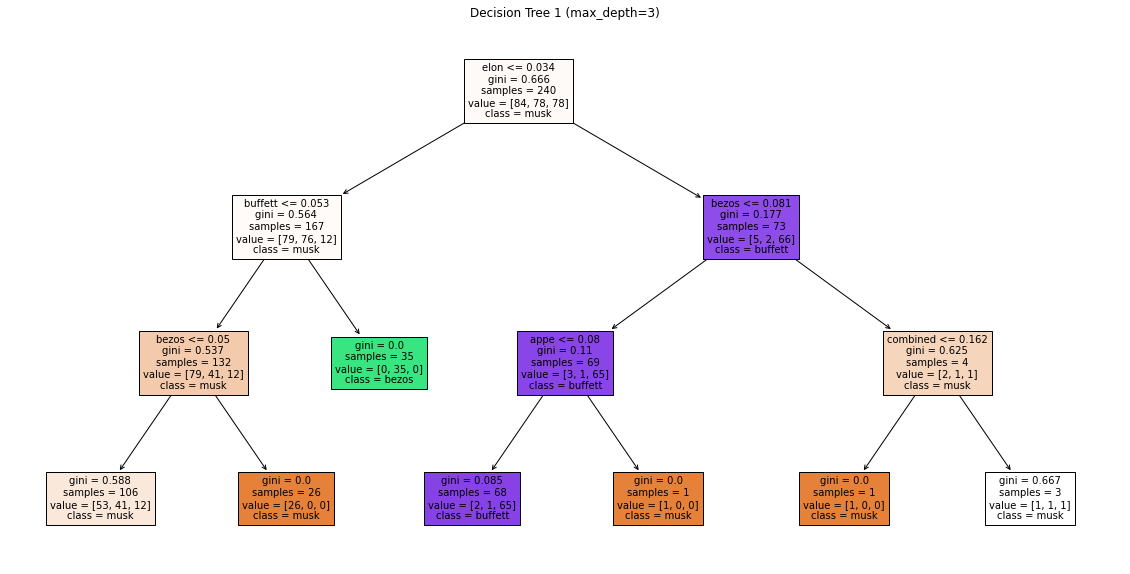

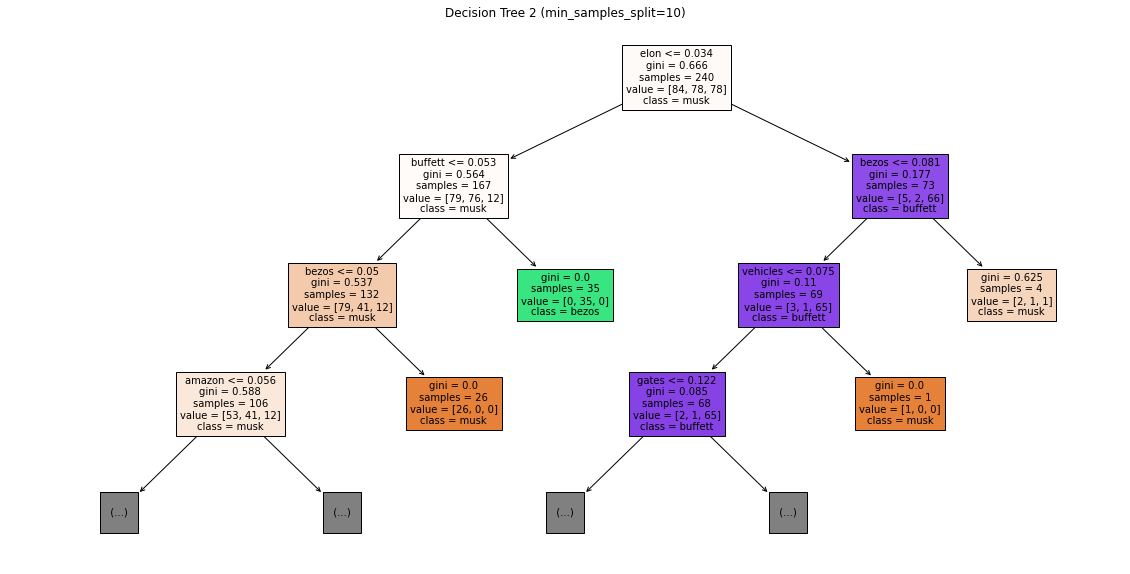

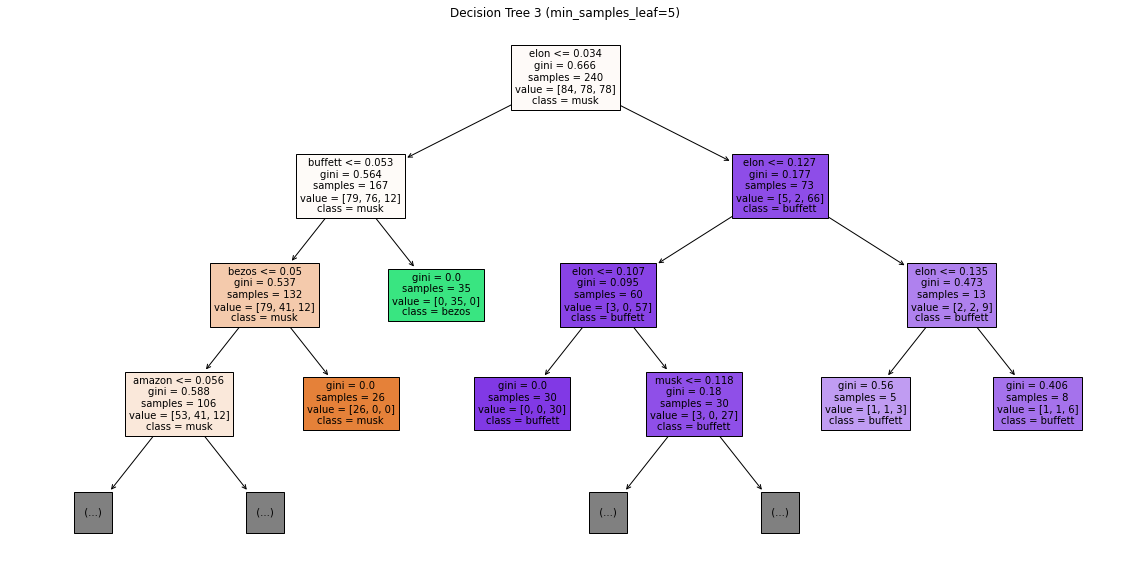

In [4]:
# Decision Tree 1: max_depth=3
dt_classifier1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier1.fit(X_train_vectorized, y_train)

# Decision Tree 2: min_samples_split=10
dt_classifier2 = DecisionTreeClassifier(min_samples_split=10, random_state=42)
dt_classifier2.fit(X_train_vectorized, y_train)

# Decision Tree 3: min_samples_leaf=5
dt_classifier3 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
dt_classifier3.fit(X_train_vectorized, y_train)

# Visualize Decision Tree 1
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier1, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.title("Decision Tree 1 (max_depth=3)")
plt.show()

# Visualize Decision Tree 2
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier2, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.title("Decision Tree 2 (min_samples_split=10)")
plt.show()

# Visualize Decision Tree 3
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt_classifier3, max_depth=3, fontsize=10, feature_names=vectorizer.get_feature_names(), class_names=['musk', 'bezos', 'buffett'], filled=True)
plt.title("Decision Tree 3 (min_samples_leaf=5)")
plt.show()
